<a href="https://colab.research.google.com/github/TerrenceAm22/BuildWeek2/blob/master/Build_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install eli5
!pip install category_encoders==2
!pip install seaborn
!pip install xgboost

In [0]:
# Loading Data set for video games sales data
# Exploring various columns and cleaning when necessary for the next few cells/

df = pd.read_csv('vgsales.csv')
df.head(50)



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [0]:
df.shape

(16598, 11)

In [0]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [0]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [0]:
df['Global_Sales'].unique()

array([8.274e+01, 4.024e+01, 3.582e+01, 3.300e+01, 3.137e+01, 3.026e+01,
       3.001e+01, 2.902e+01, 2.862e+01, 2.831e+01, 2.476e+01, 2.342e+01,
       2.310e+01, 2.272e+01, 2.200e+01, 2.182e+01, 2.140e+01, 2.081e+01,
       2.061e+01, 2.022e+01, 1.836e+01, 1.814e+01, 1.728e+01, 1.638e+01,
       1.615e+01, 1.585e+01, 1.532e+01, 1.530e+01, 1.498e+01, 1.476e+01,
       1.464e+01, 1.435e+01, 1.424e+01, 1.403e+01, 1.373e+01, 1.351e+01,
       1.346e+01, 1.310e+01, 1.304e+01, 1.273e+01, 1.227e+01, 1.221e+01,
       1.214e+01, 1.198e+01, 1.190e+01, 1.189e+01, 1.166e+01, 1.152e+01,
       1.133e+01, 1.118e+01, 1.102e+01, 1.095e+01, 1.079e+01, 1.077e+01,
       1.069e+01, 1.057e+01, 1.055e+01, 1.049e+01, 1.042e+01, 1.026e+01,
       1.021e+01, 9.880e+00, 9.870e+00, 9.820e+00, 9.760e+00, 9.720e+00,
       9.590e+00, 9.520e+00, 9.490e+00, 9.320e+00, 9.300e+00, 9.200e+00,
       9.090e+00, 9.020e+00, 8.840e+00, 8.760e+00, 8.490e+00, 8.420e+00,
       8.330e+00, 8.240e+00, 8.110e+00, 8.090e+00, 

In [0]:
y = df['Global_Sales']
y.value_counts(normalize=True)

0.02     0.064526
0.03     0.048861
0.04     0.038860
0.05     0.038077
0.01     0.037233
           ...   
9.09     0.000060
12.27    0.000060
16.38    0.000060
20.22    0.000060
22.00    0.000060
Name: Global_Sales, Length: 623, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

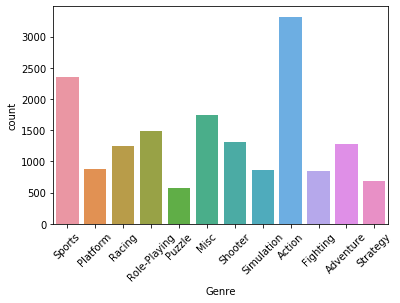

In [0]:
import seaborn as sns

sns.countplot(df['Genre'])
plt.xticks(rotation=45)

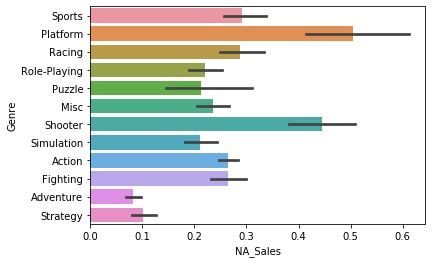

In [0]:
sns.barplot(x=df['NA_Sales'], y=df['Genre'])


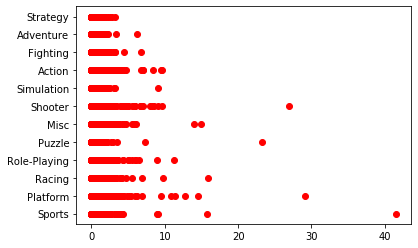

In [0]:
plt.scatter(x=df['NA_Sales'], y=df['Genre'], color='red')

In [0]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [0]:
df['Year'] = pd.to_datetime(df['Year'])
df.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [0]:
# Holding out test set before preforming training & validating dataset.

start_date = '2011-01-01'
end_date = '2015-01-01'

test = df[(df['Genre'] > start_date) | (df['Genre'] == end_date)]
test.shape

(16598, 11)

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, train_size= .50)

In [0]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
fig = px.scatter(df, x='Genre', y='Year')
fig.update_traces(marker_color='green')
fig.show()

In [0]:
train.shape, val.shape, test.shape

((8299, 11), (8299, 11), (16598, 11))

In [0]:
train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15833,15836,Kao the Kangaroo Round 2,GC,1970-01-01 00:00:00.000002005,Platform,JoWood Productions,0.01,0.00,0.0,0.00,0.02
10056,10058,Desktop Tower Defense,DS,1970-01-01 00:00:00.000002009,Strategy,THQ,0.11,0.00,0.0,0.01,0.11
7517,7519,DarkStar One: Broken Alliance,X360,1970-01-01 00:00:00.000002010,Simulation,Kalypso Media,0.11,0.08,0.0,0.02,0.20
7520,7522,Buzz! The Schools Quiz,PS2,1970-01-01 00:00:00.000002008,Misc,Sony Computer Entertainment,0.00,0.02,0.0,0.19,0.20
10733,10735,Persona 5,PS3,1970-01-01 00:00:00.000002016,Role-Playing,Unknown,0.00,0.00,0.1,0.00,0.10


In [0]:
features = ['NA_Sales', 'JP_Sales', 'EU_Sales']


In [0]:
# Setting Target of Genre
target = 'Genre'
# Selecting Features
features = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# Dropping the target
train.columns.drop([target])

# Arranging X features and y target vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

print(features)


['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


In [0]:
# Arranging data into X features matrix and y Target vectors

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)



In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


pipeline = make_pipeline(
    ce.OneHotEncoder(),
    RandomForestClassifier(random_state=20, n_jobs=-1)
)


pipeline.fit(X_train_encoded, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Train Accuracy', pipeline.score(X_train_encoded, y_train))

y_pred = pipeline.predict(X_val)

Validation Accuracy 0.200867574406555
Train Accuracy 0.5806723701650801


In [0]:
from sklearn.metrics import accuracy_score

Test_score = accuracy_score(y_pred, y_val)
Test_score

0.200867574406555

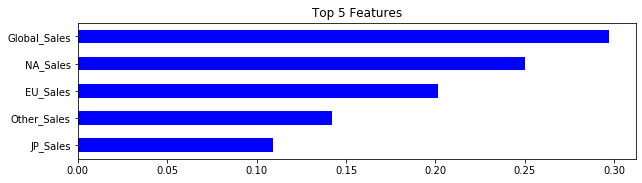

In [0]:
 #Finding out the most important features in my X_train

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 5
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='blue')

In [0]:
# Trying to boost my validation accuracy using xgboost

from xgboost import XGBClassifier

model = make_pipeline(
    ce.OneHotEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, booster='gbtree', seed=10)
)

model.fit(X_train_encoded, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interac...nts='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softp

In [0]:
from sklearn.metrics import accuracy_score
y_pred2 = model.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred2))


Validation Accuracy 0.2142426798409447


In [0]:
from sklearn.tree import DecisionTreeClassifier

pipeline4 = make_pipeline(
    ce.OneHotEncoder(),
    DecisionTreeClassifier(criterion='gini', max_depth=10, max_leaf_nodes=5,class_weight=None)
    
)


pipeline4.fit(X_train_encoded, y_train)
print('Train Accuracy', pipeline4.score(X_train_encoded, y_train))
print('Validation Accuracy', pipeline4.score(X_val, y_val))

y_pred3 = pipeline4.predict(X_val)
print(y_pred3);

Train Accuracy 0.23472707555127123
Validation Accuracy 0.22364140257862394
['Action' 'Action' 'Action' ... 'Action' 'Action' 'Role-Playing']


In [0]:
!pip install shap
!pip install pdpbox

In [0]:
plt.rcParams['figure.dpi'] = 72

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

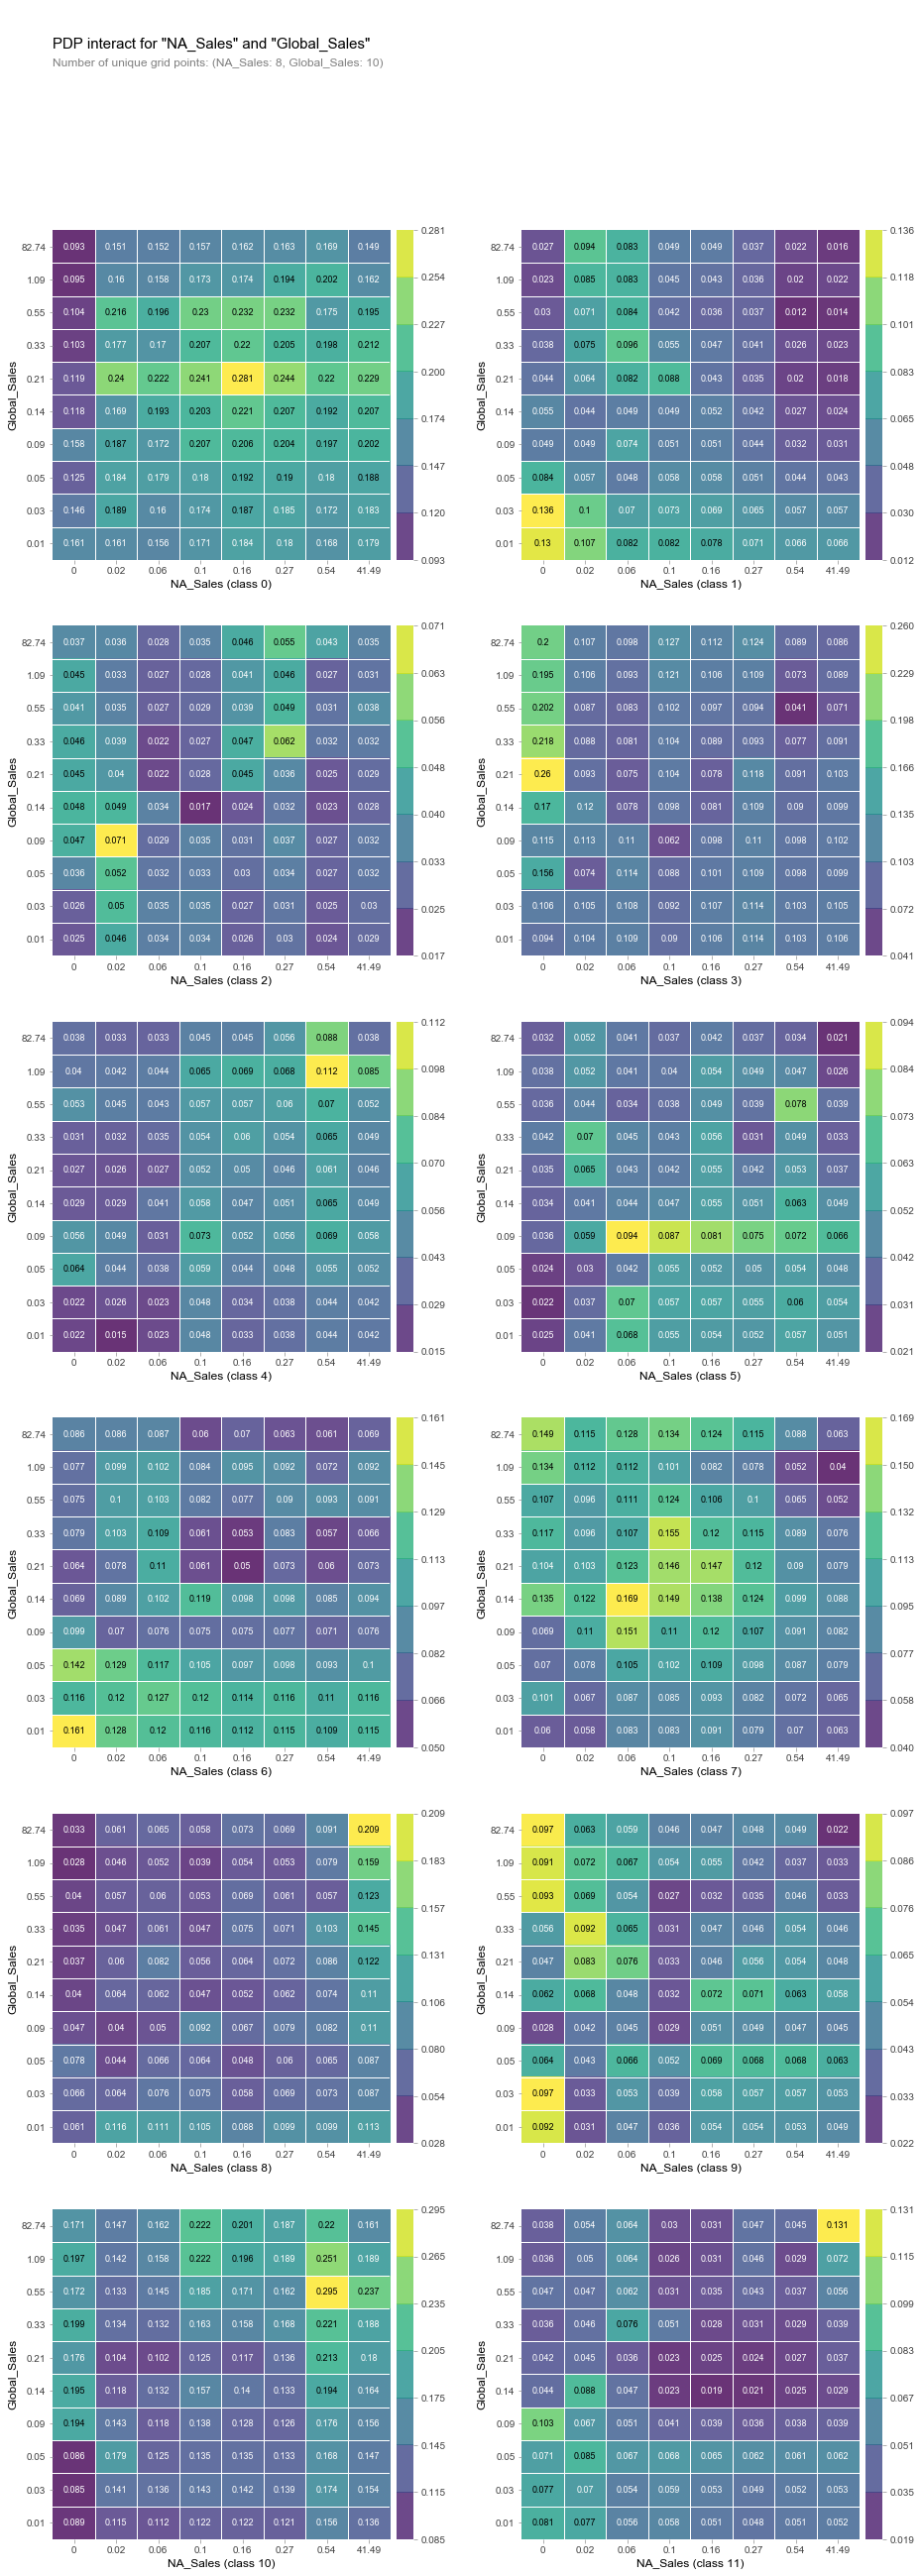

In [0]:
feature = ['NA_Sales', 'Global_Sales']


interaction = pdp_interact(
    model=pipeline, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    features=feature
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feature);

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix



In [0]:
precision_recall_fscore_support(y_val, y_pred, average='macro')

(0.07621715343514464, 0.13183108760704473, 0.0918273262917218, None)

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'NA_Sales'

isolated = pdp_isolate(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

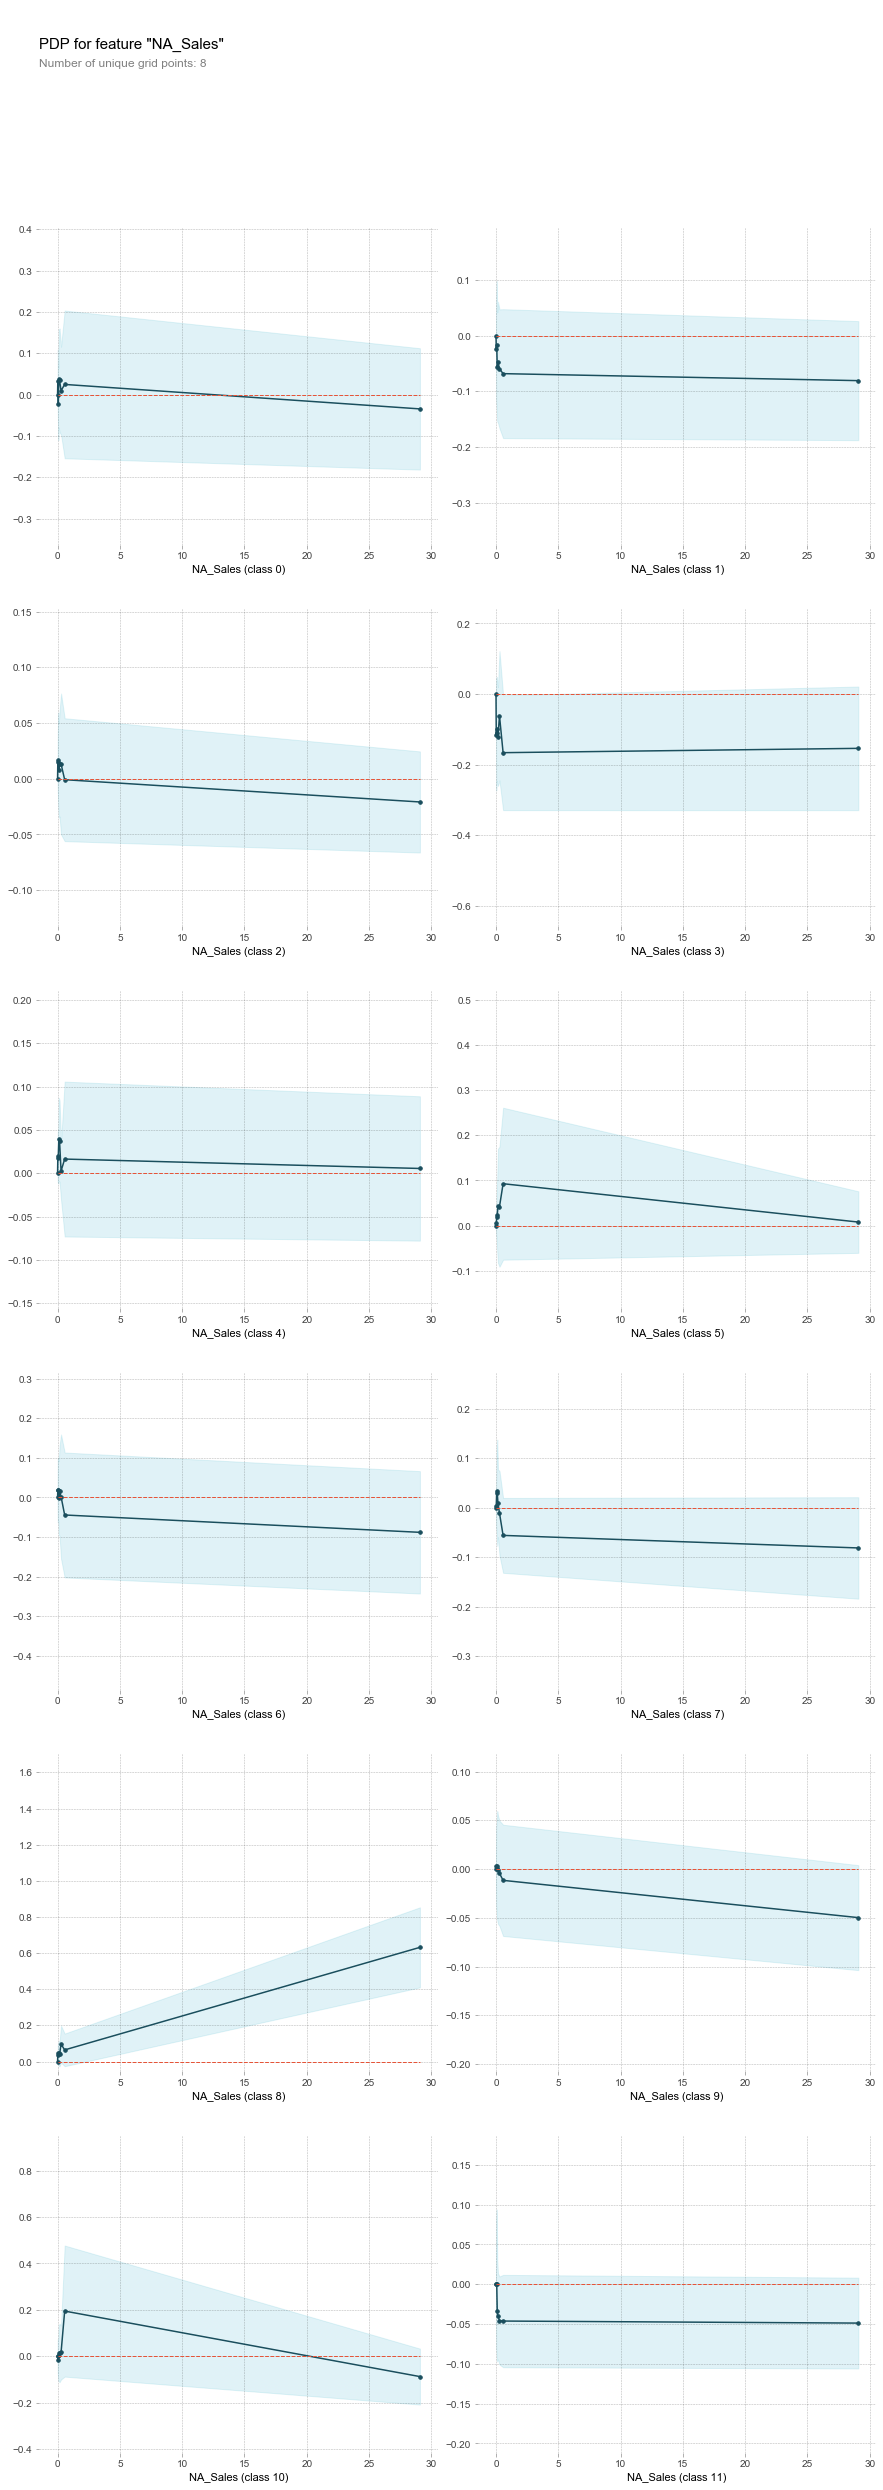

In [0]:
pdp_plot(isolated, feature_name=feature);

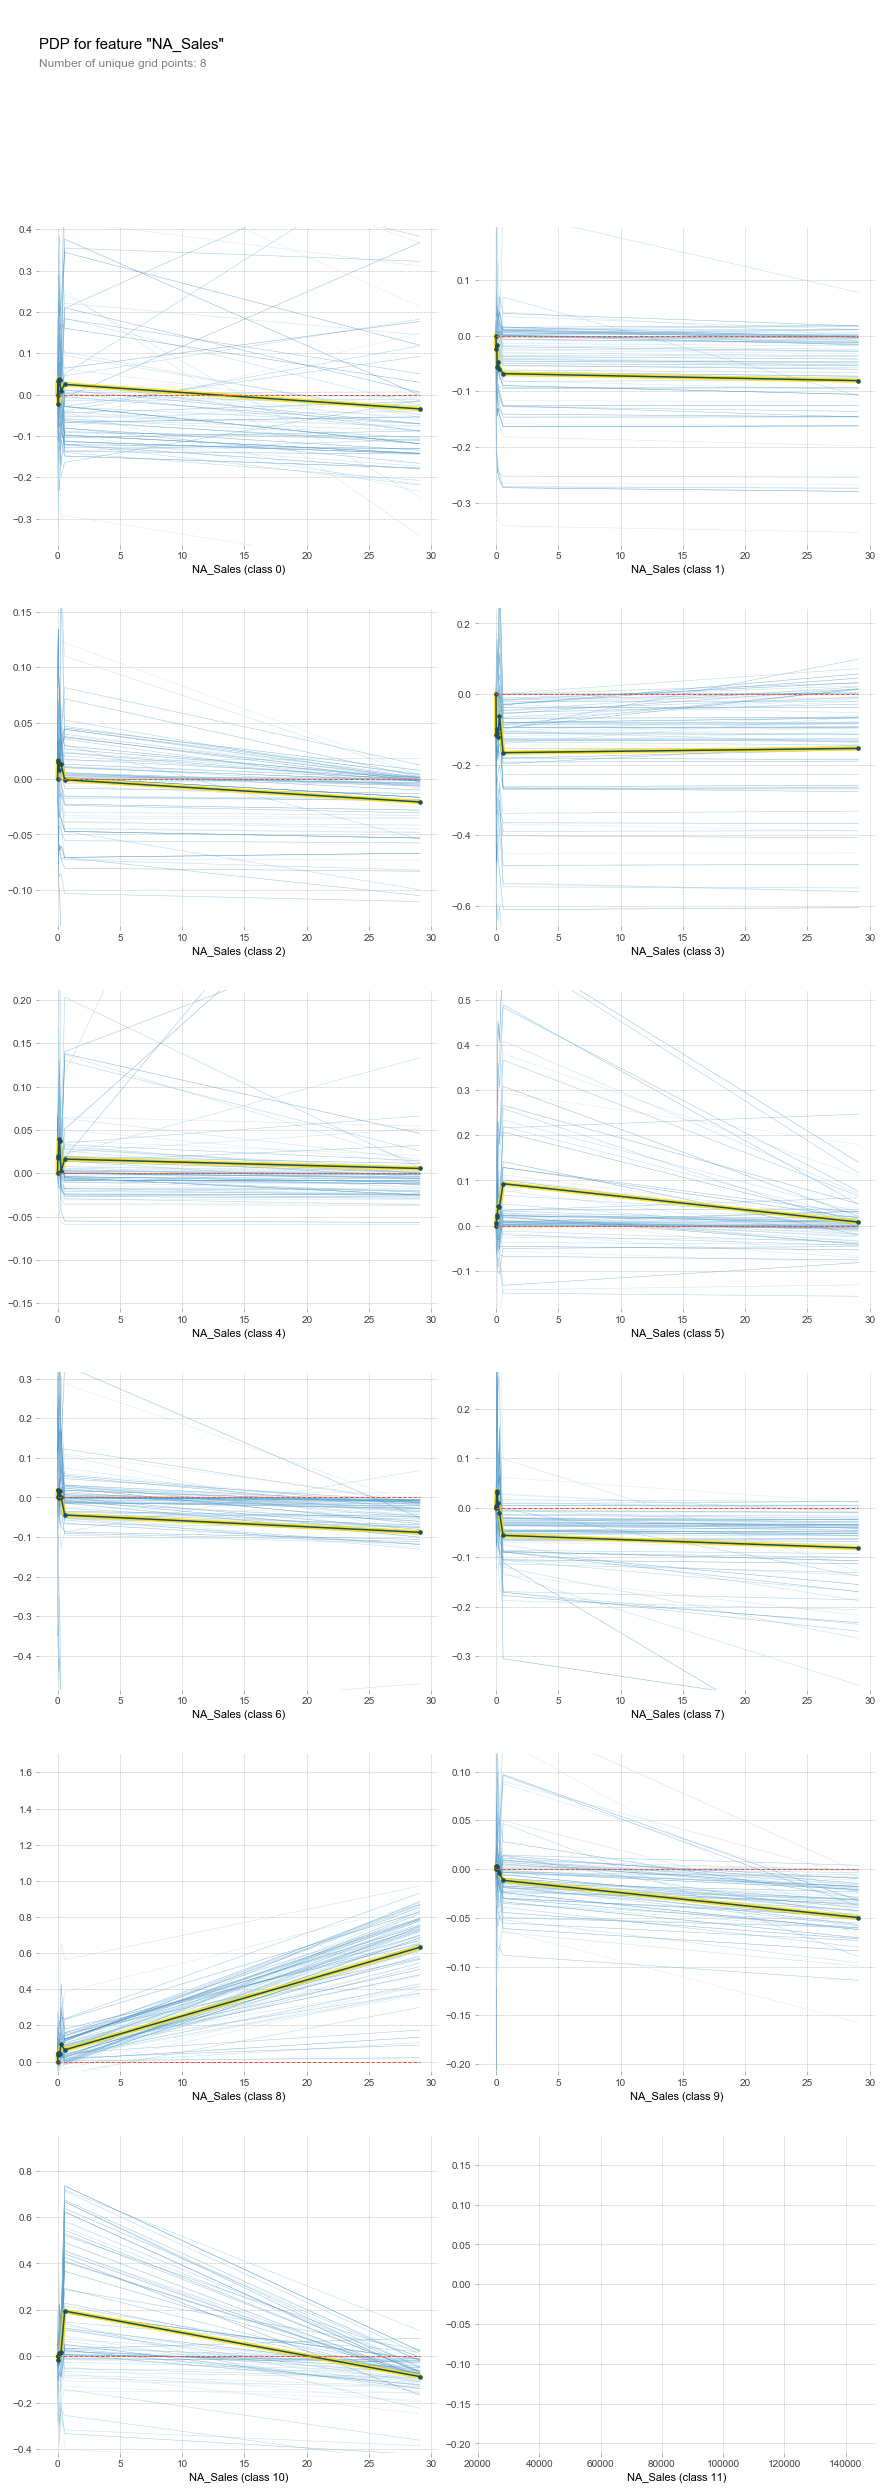

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01)
plt.xlim((20000, 150000));